In [19]:
# Import library
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

In [2]:
# Load data
df = pd.read_csv('data.csv', delimiter=';')

In [3]:
# Extract features and target
x = df[['x1', 'x2', 'x3', 'x4']].values  # Features
y = (df['target'] != 'Iris-setosa').astype(int)  # Target: 0 if Iris-setosa, 1 otherwise

In [4]:
# Manually split data into training (80%) and validation (20%) sets
n = len(x)
n_train = 80
n_val = 20

In [5]:
# Inisialization 
epoch = 6
lr = 0.1
b = 1

train_acc = [0] * epoch
val_acc = [0] * epoch
train_loss = [0] * epoch
val_loss = [0] * epoch
wb = [0] * n * epoch
t1 = [0] * n * epoch
t2 = [0] * n * epoch
t3 = [0] * n * epoch
t4 = [0] * n * epoch

dbias = [0] * n * epoch
dteta1 = [0] * n * epoch
dteta2 = [0] * n * epoch
dteta3 = [0] * n * epoch
dteta4 = [0] * n * epoch

wb[0] = 0.5
t1[0] = 0.5
t2[0] = 0.5
t3[0] = 0.5
t4[0] = 0.5

In [14]:
for e in range(epoch):
    train_accuracy = 0
    val_accuracy = 0
    train_mse = 0
    val_mse = 0
    
    # Training Phase
    for i in range(n_train):
        x1 = x[i][0]
        x2 = x[i][1]
        x3 = x[i][2]
        x4 = x[i][3]
        target = y[i]

        # Calculate dot z, g(z), error, sum square error
        z = (b * wb[(e*n_train)+i]) + (x1 * t1[(e*n_train)+i]) + (x2 * t2[(e*n_train)+i]) + (x3 * t3[(e*n_train)+i]) + (x4 * t4[(e*n_train)+i])
        gz = 1 / (1 + math.exp(-z))
        error = gz - target
        sse = math.pow(error, 2)

        # Calculate dbias, dteta1, dteta2, dteta3, dteta4
        dbias = 2 * (gz - target) * (1 - gz) * gz * b
        dteta1 = 2 * (gz - target) * (1 - gz) * gz * x1
        dteta2 = 2 * (gz - target) * (1 - gz) * gz * x2
        dteta3 = 2 * (gz - target) * (1 - gz) * gz * x3
        dteta4 = 2 * (gz - target) * (1 - gz) * gz * x4

        # Check Training Prediction
        if gz > 0.5:
            predicted_label = 1
        else:
            predicted_label = 0

        # Calculate Training Accuracy
        if target == predicted_label:
            train_accuracy += 1

        # Calculate Validation Loss
        train_mse = train_mse + sse
        
        # Update Weight Bias, Teta1, Teta2, Teta3, Teta4
        if i < n_train:
            wb[(e*n_train)+i+1] = wb[(e*n_train)+i] - (lr * dbias) 
            t1[(e*n_train)+i+1] = t1[(e*n_train)+i] - (lr * dteta1) 
            t2[(e*n_train)+i+1] = t2[(e*n_train)+i] - (lr * dteta2) 
            t3[(e*n_train)+i+1] = t3[(e*n_train)+i] - (lr * dteta3) 
            t4[(e*n_train)+i+1] = t4[(e*n_train)+i] - (lr * dteta4)

    wb_val = wb[(e*n_train)+i+1]
    t1_val = t1[(e*n_train)+i+1]
    t2_val = t2[(e*n_train)+i+1]
    t3_val = t3[(e*n_train)+i+1]
    t4_val = t4[(e*n_train)+i+1]

    # Validation Phase
    for i in range(n_train, n_train+n_val):
        x1 = x[i][0]
        x2 = x[i][1]
        x3 = x[i][2]
        x4 = x[i][3]
        target = y[i]
        
        # Calculate dot z, g(z), error, sum square error
        z = (b * wb_val) + (x1 * t1_val) + (x2 * t2_val) + (x3 * t3_val) + (x4 * t4_val)
        gz = 1 / (1 + math.exp(-z))
        error = gz - target
        sse = math.pow(error, 2)

        # Check Validation Prediction
        if gz > 0.5:
            predicted_label = 1
        else:
            predicted_label = 0

        # Calculate Validation Accuracy
        if target == predicted_label:
            val_accuracy += 1
        
        # Calculate Validation Loss
        val_mse = val_mse + sse

    # Calculate Training Accuracy and Loss per Epoch
    train_acc[e] = (train_accuracy / n_train) * 100
    train_loss[e] = (train_mse / n_train)
    #print("epoch = " + str(e) + " train accuracy = " + str(train_acc[e]) + " train loss = " + str(train_loss[e]))
    
    # Calculate Validation Accuracy and Loss per Epoch
    val_acc[e] = (val_accuracy / n_val) * 100
    val_loss[e] = (val_mse / n_val)
    #print("epoch = " + str(e) + " val accuracy = " + str(val_acc[e]) + " val loss = " + str(val_loss[e]))

Epoch = 1
Validasi: Target = 0Predicted = 1
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predicted = 1
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predicted = 1
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predicted = 1
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predicted = 1
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predicted = 1
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predicted = 1
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predicted = 1
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predicted = 1
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predicted = 1
Validasi: Target = 1Predicted = 1
epoch = 0 train accuracy = 51.24999999999999 train loss = 0.4557576649510577
epoch = 0 val accuracy = 50.0 val loss = 0.16799020200024378
Epoch = 2
Validasi: Target = 0Predicted = 0
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predicted = 0
Validasi: Target = 1Predicted = 1
Validasi: Target = 0Predic

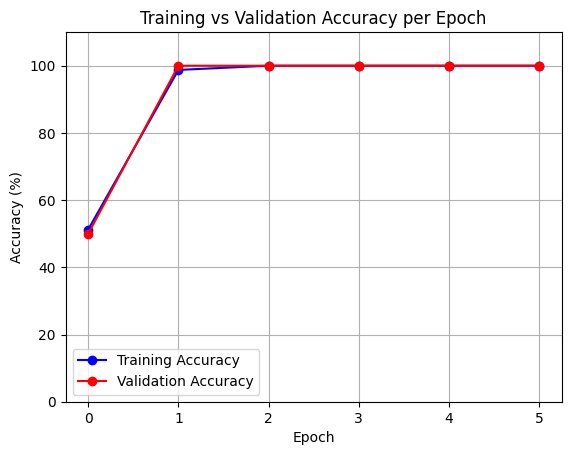

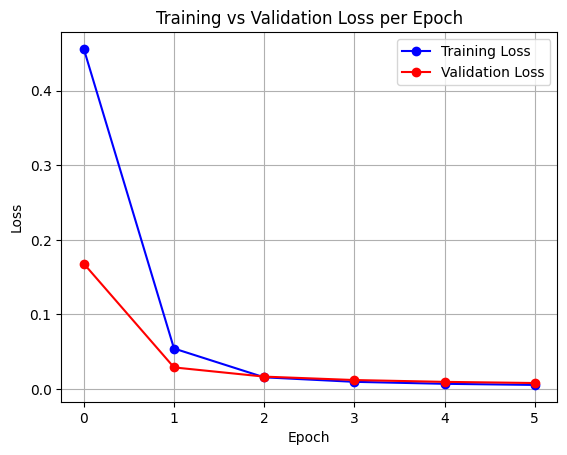

In [18]:
# Plot Training and Validation Accuracy per Epoch
plt.plot(range(epoch), train_acc, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(range(epoch), val_acc, marker='o', linestyle='-', color='r', label='Validation Accuracy')

plt.title('Training vs Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.xticks(range(epoch))  
plt.ylim(0, 110)          
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss per Epoch
plt.plot(range(epoch), train_loss, marker='o', linestyle='-', color='b', label='Training Loss')
plt.plot(range(epoch), val_loss, marker='o', linestyle='-', color='r', label='Validation Loss')

plt.title('Training vs Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(epoch))  
plt.legend()
plt.grid(True)
plt.show()
